In [3]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [4]:
# load the dataset
fertilizer = pd.read_csv("/home/rgukt-basar/Downloads/crop-and-fertlizer-recommendation-system-main/Crop_recommendation.csv")
fertilizer.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


DAP - Diammoniun Phosphate; 14-35-14 - NPK; 28-28 - NP; and so

In [5]:
# check the shape of the dataset
fertilizer.shape

(2200, 8)

In [6]:
# check the basic info of the dataset
fertilizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
 #check the missing values in the dataset
fertilizer.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
# check the basic statistics of the dataset
fertilizer.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
 #Only select the numerical columns
fertilizer_numeric = fertilizer.select_dtypes(include=[np.number])
corr = fertilizer_numeric.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [15]:
# Only select the numerical columns
fertilizer_numeric = fertilizer.select_dtypes(include=[np.number])
corr = fertilizer_numeric.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


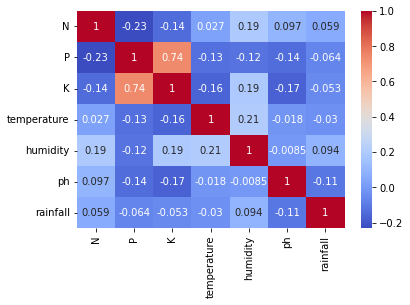

In [16]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')
plt.show()

In [19]:
fertilizer['N'].value_counts()

N
22     44
40     44
27     42
39     41
31     41
       ..
132     2
46      1
135     1
139     1
130     1
Name: count, Length: 137, dtype: int64

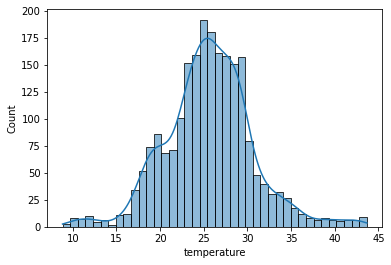

In [21]:
# check the distribution of the temperature column
sns.histplot(fertilizer['temperature'], kde=True)
plt.show()

In [22]:
 #Only select the numerical columns 
features = fertilizer.select_dtypes(include=[np.number]).columns.tolist()
print(features)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


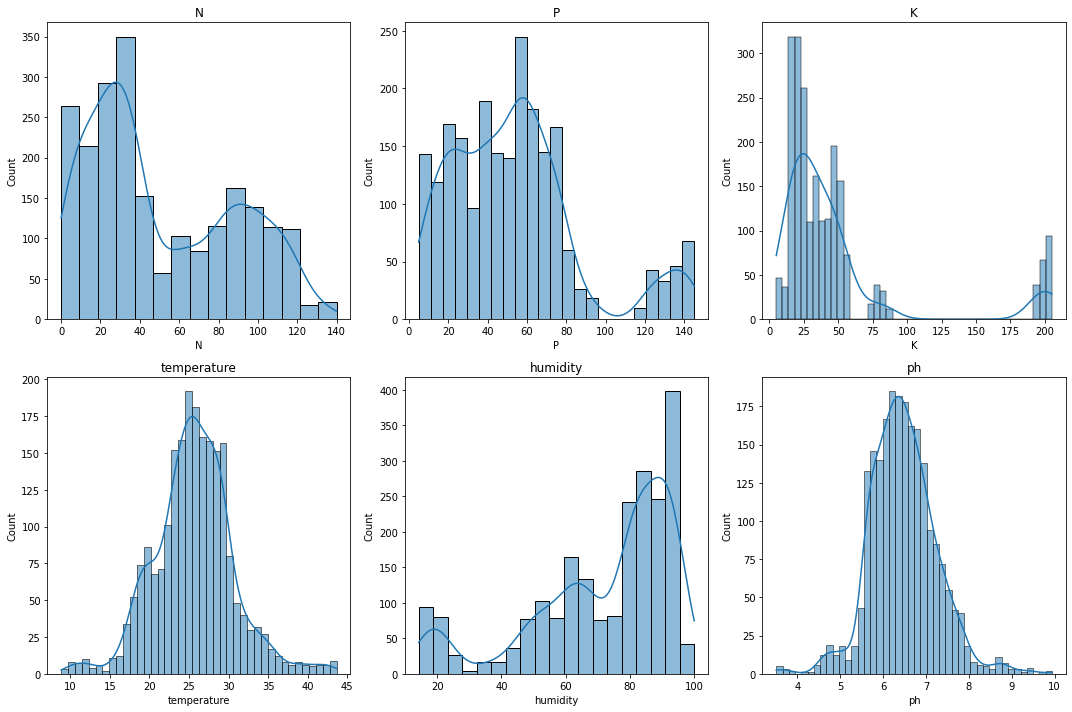

In [23]:
# visualize the distribution of each feature
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(fertilizer[i], ax=subplot, kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

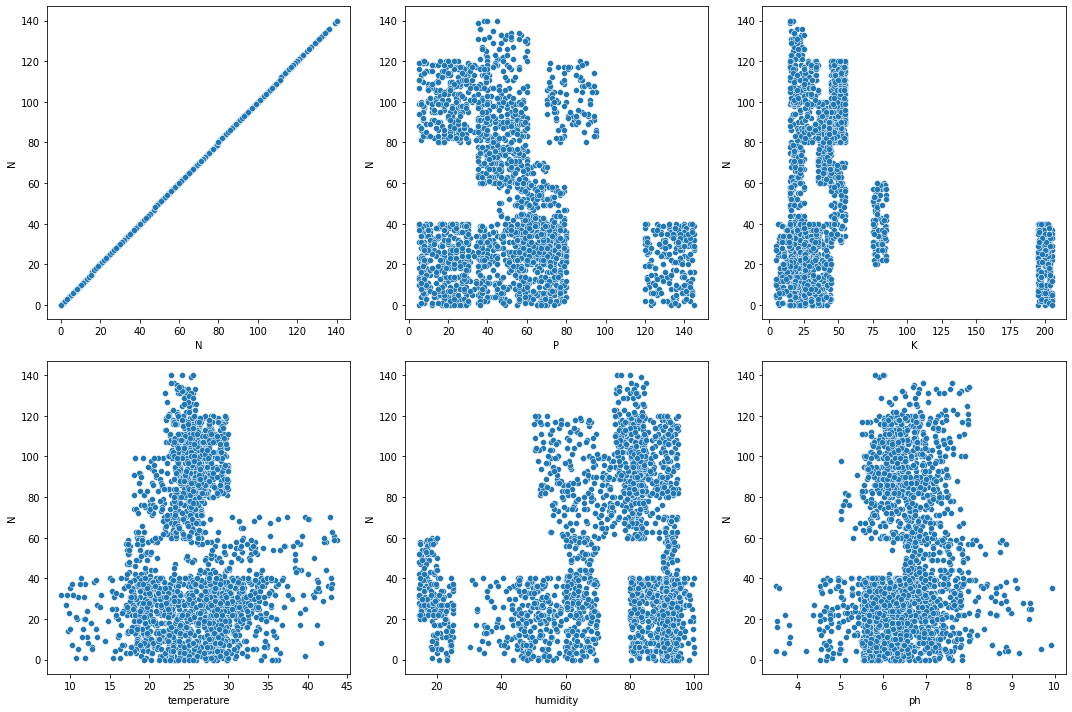

In [25]:
 #plot scatter plot of each feature against the target
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='N', data=fertilizer, ax=subplot)
plt.tight_layout()
plt.show()

#### Encoding the target column

In [45]:
fert_dict = {
'Urea':1,
'DAP':2,
'14-35-14':3,
'28-28':4,
'17-17-17':5,
'20-20':6,
'10-26-26':7,
}

In [46]:
fertilizer['fert_no'] = fertilizer['Fertilizer Name'].map(fert_dict)

In [47]:
fertilizer['fert_no'].value_counts()

fert_no
1    22
2    18
4    17
3    14
6    14
5     7
7     7
Name: count, dtype: int64

In [48]:
# drop the target column with name and keep the target column with numbers
fertilizer.drop('Fertilizer Name',axis=1,inplace=True)
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,fert_no
0,26,52,38,Sandy,Maize,37,0,0,1
1,29,52,45,Loamy,Sugarcane,12,0,36,2
2,34,65,62,Black,Cotton,7,9,30,3
3,32,62,34,Red,Tobacco,22,0,20,4
4,28,54,46,Clayey,Paddy,35,0,0,1


In [49]:
# Select the object columns
fertilizer.select_dtypes(include=['object']).columns

Index(['Soil Type', 'Crop Type'], dtype='object')

In [50]:
#convert the categorical columns to numerical columns using labelencoder
lb = LabelEncoder()
fertilizer["Soil Type"]=lb.fit_transform(fertilizer['Soil Type'])
fertilizer['Crop Type']=lb.fit_transform(fertilizer['Crop Type'])

In [51]:
fertilizer.head()



,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,fert_no
0,26,52,38,4,3,37,0,0,1
1,29,52,45,2,8,12,0,36,2
2,34,65,62,0,1,7,9,30,3
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,1


In [52]:
# split the dataset into features and target
x = fertilizer.drop('fert_no',axis=1)
y = fertilizer['fert_no']
# print the shape of features and target
print(f"The shape of features is: {x.shape}")
print(f"The shape of target is: {y.shape}")


The shape of features is: (99, 8)
The shape of target is: (99,)


In [53]:
# split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

# print the shape of training and testing sets
print(f"The shape of x_train is: {x_train.shape}")
print(f"The shape of x_test is: {x_test.shape}")
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of y_test is: {y_test.shape}")

The shape of x_train is: (79, 8)
The shape of x_test is: (20, 8)
The shape of y_train is: (79,)
The shape of y_test is: (20,)


### Scaling

In [54]:
#Scale the features using StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Training Models

In [55]:
# insialize the DecisionTreeClassifier
model = DecisionTreeClassifier()

In [56]:
# train the model
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [57]:
# evaluate the model on the test set and print the accuracy
accuracy = model.score(x_test, y_test)
print(f"The accuracy of the model is: {accuracy*100:.2f}%")

The accuracy of the model is: 100.00%


In [58]:
# evaluate the model on the training set and print the accuracy
accuracy = model.score(x_train, y_train)
print(f"The accuracy of the model on the training set is: {accuracy*100:.2f}%")

The accuracy of the model on the training set is: 100.00%


## Predictive System

In [59]:
def recommend_fertilizer(Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous):
    features = np.array([[Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous]])
    transformed_features = sc.transform(features)
    prediction = model.predict(transformed_features).reshape(1,-1)
    fert_dict = {1: 'Urea', 2: 'DAP', 3: '14-35-14', 4: '28-28', 5: '17-17-17', 6: '20-20', 7: '10-26-26'}
    fertilizer = [fert_dict[i] for i in prediction[0]]
    
    return f"{fertilizer} is a best fertilizer for the given conditions" 

In [60]:
# Given input values
Temparature = 26
Humidity = 0.5
Moisture = 0.6
Soil_Type = 2
Crop_Type = 3
Nitrogen = 10
Potassium = 15
Phosphorous = 6
    
# Use the recommendation function to get a prediction
recommend_fertilizer(Temparature, Humidity, Moisture, Soil_Type, Crop_Type, Nitrogen, Potassium, Phosphorous)

"['17-17-17'] is a best fertilizer for the given conditions"